In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

%matplotlib inline

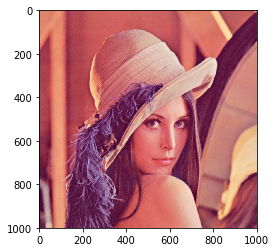

In [12]:
img = cv2.imread("test.jpg")
img = cv2.resize(img,(1000, 1000))
img = img[:, :, ::-1]#rgb倒着复制一遍
plt.imshow(img)

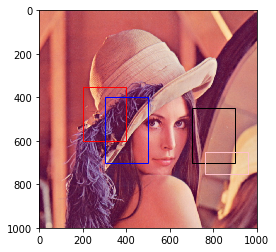

In [4]:
boxes = [[200,350,400,600],[300, 400, 500, 700],[700, 450, 900, 700],[760, 650, 960, 750]]
plt.imshow(img)
acx = plt.gca()
colors = ['r', 'blue', 'black', 'pink']

for i,c in enumerate(colors):
    box = boxes[i]
    rec = patches.Rectangle((box[0], box[1]),box[2]-box[0],box[3]-box[1],edgecolor=str(c),
    facecolor='none')
    acx.add_patch(rec)
    

In [15]:
normalized_boxes = np.array(boxes) / 1000
scores = [0.3, 0.6, 0.8, 0.2]
proposal_count = 4
nms_thresh = 0.5#相交超过thresh进行pk

idxs = tf.image.non_max_suppression(normalized_boxes, scores, proposal_count, nms_thresh)

In [16]:
sess = tf.Session()

sess.run(idxs)

array([2, 1, 0, 3])